## Example 2DEX from CAL Manual
![Figure One](img/cal-2dex-1.svg)

![Figure Two](img/cal-2dex-2.svg)

This example has been changed to add numbers to the constrained degrees of freedom.  The numbers are corrected to 0-origin, below.  But for those two items, this input file is almost identical to that given in the [CAL manual](CAL Manual.pdf).

In [1]:
import PyCAL86
import numpy as np
np.set_printoptions(precision=5,linewidth=200,suppress=True)

In [2]:
%%CAL86 -v
C FORMATION OF ELEMENT MATRICES
FRAME K1 T1 I=1000 A=20 E=30000   X=0,0     Y=150,300
FRAME K2 T2 I=1000 A=20 E=30000   X=350,300 Y=150,300
FRAME K3 T3 I=1000 A=20 E=30000   X=0,0     Y=0,150
FRAME K4 T4 I=1000 A=20 E=30000   X=400,350 Y=0,150
FRAME K5 T5 I=2000 A=30 E=30000   X=0,300   Y=300,300
FRAME K6 T6 I=2000 A=30 E=30000   X=0,350   Y=150,150
PRINT K4
PRINT T4
PRINT K5
PRINT T5

C LOAD LOCATION ARRAY

LOADI LM R=6 C=6
 13 14 17 15 11 13
  7  9 18 16  8  7
  4  5 19  6  1  4
 11 12 13 14 12 14
  8 10  7  9 10  9
  1  3  4  5  2  5


C FORMATION OF ELEMENT MATRICES
FRAME K1 T1 I=1000 A=20 E=30000   X=0,0     Y=150,300
FRAME K2 T2 I=1000 A=20 E=30000   X=350,300 Y=150,300
FRAME K3 T3 I=1000 A=20 E=30000   X=0,0     Y=0,150
FRAME K4 T4 I=1000 A=20 E=30000   X=400,350 Y=0,150
FRAME K5 T5 I=2000 A=30 E=30000   X=0,300   Y=300,300
FRAME K6 T6 I=2000 A=30 E=30000   X=0,350   Y=150,150
PRINT K4
K4:
[[    461.43956   -1111.09788   -6830.51975    -461.43956    1111.09788   -6830.51975]
 [  -1111.09788    3424.36723   -2276.83992    1111.09788   -3424.36723   -2276.83992]
 [  -6830.51975   -2276.83992  758946.63844    6830.51975    2276.83992  379473.31922]
 [   -461.43956    1111.09788    6830.51975     461.43956   -1111.09788    6830.51975]
 [   1111.09788   -3424.36723    2276.83992   -1111.09788    3424.36723    2276.83992]
 [  -6830.51975   -2276.83992  379473.31922    6830.51975    2276.83992  758946.63844]]
PRINT T4
T4:
[[  -6830.51975   -2276.83992  758946.63844    6830.51975    2276.83992  379473.31922]
 [  -6830.5

### Correct the DOF #s to 0-origin

In [3]:
LM = LM - 1   # adjust the DOF #s because here we start numbering at 0, not 1

### And continue on ...

In [4]:
%%CAL86 -v
PRINT LM

C FORMATION OF GLOBAL STIFFNESS MATRIX
ZERO K R=19 C=19
ADDK K K1 LM N=1-1
ADDK K K2 LM N=2-1
ADDK K K3 LM N=3-1
ADDK K K4 LM N=4-1
ADDK K K5 LM N=5-1
ADDK K K6 LM N=6-1
C ENTER LOAD MATRIX

LOAD PT R=1 C=19
0 0 0 0 0 0 0 0 0 0 5 0 10 0 0 0 0 0 0

TRAN PT P
P P
ZERO D R=19 C=1
C SOLVE EQUILIBRIUM EQUATIONS
PSOLVE K D P  PS=15
P P
P D

C CALCULATE MEMBER FORCES - LOCAL SYSTEM
MEMFRC T1 D LM F1 N=1-1
P F1
MEMFRC T2 D LM F2 N=2-1
P F2
MEMFRC T3 D LM F3 N=3-1
P F3
MEMFRC T4 D LM F4 N=4-1
P F4
MEMFRC T5 D LM F5 N=5-1
P F5
MEMFRC T6 D LM F6 N=6-1
P F6
C CALCULATE MEMBER FORCES - GLOBAL SYSTEM
MEMFRC K4 D LM G4 N=4-1
P G4


PRINT LM
LM:
[[12 13 16 14 10 12]
 [ 6  8 17 15  7  6]
 [ 3  4 18  5  0  3]
 [10 11 12 13 11 13]
 [ 7  9  6  8  9  8]
 [ 0  2  3  4  1  4]]

C FORMATION OF GLOBAL STIFFNESS MATRIX
ZERO K R=19 C=19
ADDK K K1 LM N=1-1
ADDK K K2 LM N=2-1
ADDK K K3 LM N=3-1
ADDK K K4 LM N=4-1
ADDK K K5 LM N=5-1
ADDK K K6 LM N=6-1
C ENTER LOAD MATRIX

LOAD PT R=1 C=19
0 0 0 0 0 0 0 0 0 0 5 0 10 0 0 0 0 0 0
ARRAY NAME = PT    NUMBER OF ROWS =    1 NUMBER OF COLUMNS =   19

TRAN PT P
P P
P:
[[  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  5.]
 [  0.]
 [ 10.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]]
ZERO D R=19 C=1
C SOLVE EQUILIBRIUM EQUATIONS
PSOLVE K D P  PS=15
P P
P:
[[    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    0.     ]
 [    5.     ]
 [    0.     ]
 [   10.     ]
 [    0.     ]
 [    0.     ]
 [    4.05465]
 [  -15.     ]
 [   -4.05465]
 [ 1378.13964]]
P D
D:
[[-0.000

### Force Numbering

![Signs](img/2d-signs.svg)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

### Bending Moment Diagram, Member 5

In [6]:
F5

matrix([[-265.74462],
        [  -0.     ],
        [  -3.83118],
        [  -0.88582]])

In [8]:
x = np.linspace(0,300)
m5 = F5[3,0]*x - F5[0,0]
plt.plot(x,m5)
plt.grid(True)

### Bending Moment Diagram, Member 6

In [17]:
F6

matrix([[-781.43839],
        [-327.65403],
        [   3.83118],
        [  -3.16884]])

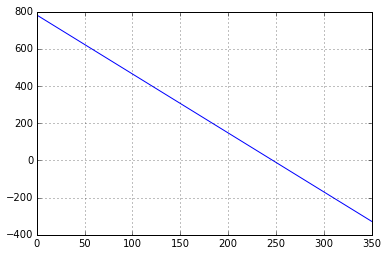

In [18]:
x = np.linspace(0,350.)
m6 = F6[3,0]*x - F6[0,0]
plt.plot(x,m6)
plt.grid(True)

In [19]:
m6[-1]

-327.65402759112487